# MATH 210 Assignment 4

### Instructions

* Write your solutions in the cells with `YOUR CODE HERE`.
* You may work with others but submit your own solutions.
* Execute the test cells to verify that your solutions pass.
* **This notebook contains hidden tests!** Your solution may not be completely correct even if it passes all tests below.
* Do **not** import any Python packages (other than the packages in the cell below).
* Submit this notebook to Canvas.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.linalg as la

## Problem 1 (5 marks)

Write a function called `diffyq` which takes input parameters `y0`, `tf` and `N` and implements Euler's method with step size $h = \frac{t_f}{N}$ to approximate the solution of the equation

$$
y' = t \cos(y) + \sin(ty) \ , \ y(0) = y_0
$$

over the interval $[0,t_f]$. The function returns a 2D NumPy array of size $N+1$ by 2 where the column at index 0 is the array of $t$ values from 0 to $t_f$, and the column at index 1 is the array of corresponding $y$ values given by Euler's method. The function [`numpy.column_stack`](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html) may be helpful.

For example, the following code creates the figure below:

```
U = diffyq(1,10,1000)
plt.plot(U[:,0],U[:,1])
plt.show()
```

<img src="http://www.math.ubc.ca/~pwalls/data/a3prob6.png" style="width: 500px">

In [56]:
# YOUR CODE HERE
def diffyq(y0, tf, N):
    h = tf / N  
    t_values = np.linspace(0, tf, N+1) 
    y_values = np.zeros(N+1)  
    y_values[0] = y0  
    for i in range(N):
        t = t_values[i]
        y = y_values[i]
        y_values[i+1] = y + h * (t * np.cos(y) + np.sin(t * y))  

    return np.column_stack((t_values, y_values))


In [57]:
"Verify diffyq returns a NumPy array. (1 mark)"
assert isinstance(diffyq(1,5,5),np.ndarray), "Return type should be a NumPy array."
print("Test 1: Success!")

Test 1: Success!


In [58]:
"Verify diffyq returns an array of correct size. (1 mark)"
N = 20
assert np.allclose(diffyq(-1,20,N).shape,(N+1,2)) , "Return type should be a NumPy array of size N+1 by 2."
print("Test 2: Success!")

Test 2: Success!


In [59]:
"Verify diffyq returns t values. (1 mark)"
result = diffyq(3,0.5,10)
assert np.allclose(result[:5,0],[0.,0.05,0.1,0.15,0.2])
print("Test 3: Success!")

Test 3: Success!


In [60]:
"Verify diffyq returns correct y values. This cell contains hidden tests. (2 marks)"
y1 = np.array([0,0])
result1 = diffyq(0,5,1)
assert np.allclose(result1[:,1],y1)
y2 = [-1.,-1.,-1.00714212,-1.02158761,-1.04384243,-1.07472931,-1.1153344]
result2 = diffyq(-1,3,24)
assert np.allclose(result2[:7,1],y2)
print("Test 4: Success!")

Test 4: Success!


## Problem 2 (3 marks)

Use `scipy.integrate.odeint` to approximate the solution of the equation

$$
y' = t \cos(y) + \sin(ty) \ , \ y(0) = 1
$$

over the interval $[0,10]$. Save the approximation of $y(10)$ as `y10`.

In [61]:
# YOUR CODE HERE
def dydt(y, t):
    return t * np.cos(y) + np.sin(t * y)

y0 = 1

t_values = np.linspace(0, 10, 100) 

y_solution = spi.odeint(dydt, y0, t_values)

y10 = y_solution[-1 , 0]


In [62]:
"Verify y10 is positive number. (1 mark)"
assert y10 > 0
print("Test 1: Success!")

Test 1: Success!


In [63]:
"Verify the value of y10. This cell contains hidden tests. (2 marks)"
assert np.abs(y10 - 1.57) < 0.01
print("Test 2: Success!")

Test 2: Success!


##  Problem 3 (5 marks)

Write a function called `odeSystem` which takes input parameters `p`, `q`, `r`, `u0` and `t` where

* `p`, `q` and `r` are numbers
* `u0` is a Python list defining the initial values $[x(t_0),x'(t_0),y(t_0),y'(t_0)]$
* `t` is a 1D NumPy array of $t$ values over an interval $[t_0,t_f]$.

The function uses `scipy.integrate.odeint` to numerically solve the system of equations:

\begin{align*}
x'' - q^2 \sin(r) y' + p^2 x &= 0 \\
y'' + q^2 \sin(r) x' + p^2 y &= 0
\end{align*}

The function returns a 2D NumPy array of size `len(t)` by 3 where the column at index 0 is the array of $t$ values, the column at index 1 is the corresponding array of $x$ values and the column at index 2 is the corresponding array of $y$ values.

In [71]:
# YOUR CODE HERE

def odeSystem(p,q,r,u0,t):
    odeRHS = lambda u,t: [u[1], q**2*np.sin(r)*u[3]-p**2*u[0],
                u[3], -q**2*np.sin(r)*u[1]-p**2*u[2]]
    
    u = spi.odeint(odeRHS,u0,t)
    
    return np.array([[t[i],u[i,0],u[i,2]] for i in range(len(t))])

For example, the code in the cell below generates the following figure:

<img src="http://www.math.ubc.ca/~pwalls/data/a4prob2.png" style="width: 500px">

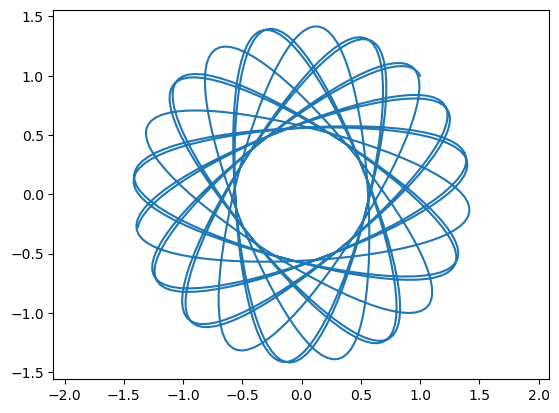

In [72]:
result = odeSystem(5,1,np.pi/2,[1,-1,1,2],np.linspace(0,20,1000))
x = result[:,1]
y = result[:,2]
plt.plot(x,y)
plt.axis('equal')
plt.show()

In [73]:
"Verify odeSystem returns a NumPy array. (1 mark)"
assert isinstance(odeSystem(1,1,0,[0,0,0,0],np.linspace(0,1,10)),np.ndarray)
print("Test 1: Success!")

Test 1: Success!


In [74]:
"Verify odeSystem returns an array of the correct size. (1 mark)"
assert np.allclose(odeSystem(3,3,np.pi/6,[1,0,1,0],np.linspace(0,5,20)).shape, [20,3])
assert np.allclose(odeSystem(2,1,np.pi/2,[1,-1,1,2],np.linspace(0,5,30)).shape, [30,3])
print("Test 2: Success!")

Test 2: Success!


In [75]:
"Verify odeSystem returns the correct values. (1 mark)"
solution = odeSystem(2,1,np.pi/2,[1,-1,1,2],np.linspace(0,10,200))
M = np.array([[0.        , 1.        , 1.        ],
              [0.05025126, 0.94724525, 1.09659084],
              [0.10050251, 0.88957504, 1.18488732],
              [0.15075377, 0.82713834, 1.26424152],
              [0.20100503, 0.76010173, 1.33408774]])
assert np.allclose(solution[:5,:],M)
print("Test 3: Success!")

Test 3: Success!


In [76]:
"Verify odeSystem returns the correct values. This cell contains hidden tests. (2 marks)"

'Verify odeSystem returns the correct values. This cell contains hidden tests. (2 marks)'

## Problem 4 (5 marks)

Write a function called `odeRK4` which takes input parameters `f`, `t` and `y0` where:

* `f` is a function representing the right side of a differential equation $y' = f(t,y)$
* `t` is a NumPy array of $t$ values
* `y0` is the initial condition $y(t_0) = y_0$

The function `odeRK4` returns a NumPy array of $y$ values given by the numerical method

\begin{align*}
h &= t_{n+1} - t_n \\
k_1 &= f(t_n,y_n) \\
k_2 &= f(t_n + h/2,y_n + k_1 h/2) \\
k_3 &= f(t_n + h/2,y_n + k_2 h/2) \\
k_4 &= f(t_n + h,y_n + k_3h) \\
y_{n+1} &= y_n + (k_1/6 + k_2/3 + k_3/3 + k_4/6)h
\end{align*}

In [77]:
# YOUR CODE HERE
def odeRK4(f,t,y0):
    y=np.zeros(t.shape)
    y[0]=y0
    for n in range(0,len(t)-1):
        h=t[n+1]-t[n]
        k1=f(t[n],y[n])
        k2=f(t[n]+h/2,y[n]+k1*h/2)
        k3=f(t[n]+h/2,y[n]+k2*h/2)
        k4=f(t[n]+h,y[n]+k3*h)
        y[n+1]=y[n]+(k1/6+k2/3+k3/3+k4/6)*h
    return y

The function odeRK4 should give a good approximation of the solution of any first order system such as $y'=y\cos(t)$, $y(0)=1$.

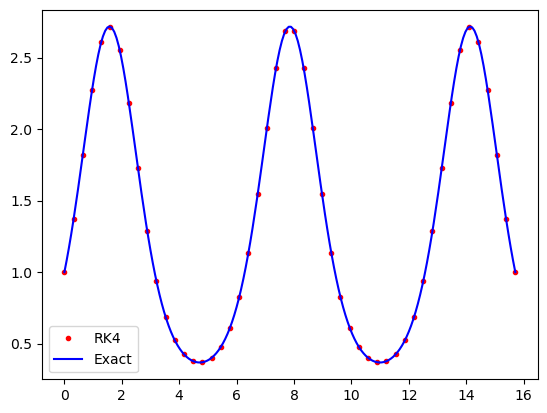

In [78]:
t = np.linspace(0,5*np.pi,50)
f = lambda t,y: y*np.cos(t)
y0 = 1
y = odeRK4(f,t,y0)
t_exact = np.linspace(0,5*np.pi,200)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t,y,'r.',t_exact,y_exact,'b'), plt.legend(['RK4','Exact'])
plt.show()

In [79]:
"Check odeRK4 returns correct type. (1 mark)"
f = lambda t,y: -y
t = np.linspace(0,1,10)
y0 = 1
assert isinstance(odeRK4(f,t,y0),np.ndarray) , "Return value should be a NumPy array."
print("Test 1: Success!")

Test 1: Success!


In [80]:
"Check odeRK4 returns an array of the correct shape. (1 mark)"
f = lambda t,y: -y
t = np.linspace(0,1,10)
y0 = 1
assert np.shape(odeRK4(f,t,y0)) == np.shape(t)
print("Test 2: Success!")

Test 2: Success!


In [50]:
"Check odeRK4 returns correct values. (1 mark)"
f = lambda t,y: -y
t = np.linspace(0,1,10)
y0 = 1
epsilon = 1e-8
y = np.array([1. , 0.89483946, 0.80073765, 0.71653164, 0.64118079, 0.57375386, 0.5134176 , 0.45942632, 0.4111128 , 0.36787995])
assert np.max(np.abs((odeRK4(f,t,y0) - y))) < epsilon
print("Test 3: Success!")

Test 3: Success!


In [51]:
"Check odeRK4 returns correct values. This cell contains hidden tests. (2 marks)"

'Check odeRK4 returns correct values. This cell contains hidden tests. (2 marks)'